In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
betas = pd.read_csv("MGWR model/MGWR_election_20_results.csv")

In [3]:
betas = betas.iloc[:,4:19]

In [4]:
shp = gpd.read_file("Data/Census_all")
shp = shp.to_crs('ESRI:102008')
state = shp.dissolve(by='STATEFP').geometry.boundary

In [5]:
names=betas.columns

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm,colors

def plot_b(j):
    
    vmin = -1#.min()
    vmax = 1#.max()
        
    cmap = np.vstack([cm.get_cmap("bwr_r")(np.linspace(0,0.4,8)),
                 cm.get_cmap("bwr_r")(np.linspace(0.6,1,8))])
    
    cmap = mpl.colors.ListedColormap(cmap)
        
    ax = shp.plot(column=betas.iloc[:,j],vmin=-1,vmax=1,figsize=(12,12),cmap=cmap,
                  linewidth=0.1,edgecolor='white')

    state.plot(color=None,ax=ax,linewidth=0.5,edgecolor='black')

    plt.axis('off')
    name = names[j]
    plt.title(name,fontsize=15)
    
    norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    fig = ax.get_figure()
    cax = fig.add_axes([0.95, 0.3, 0.025, 0.4])
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    plt.savefig('MGWR Maps/mgwr_election_20_' + name + '.png',dpi=600,bbox_inches='tight')

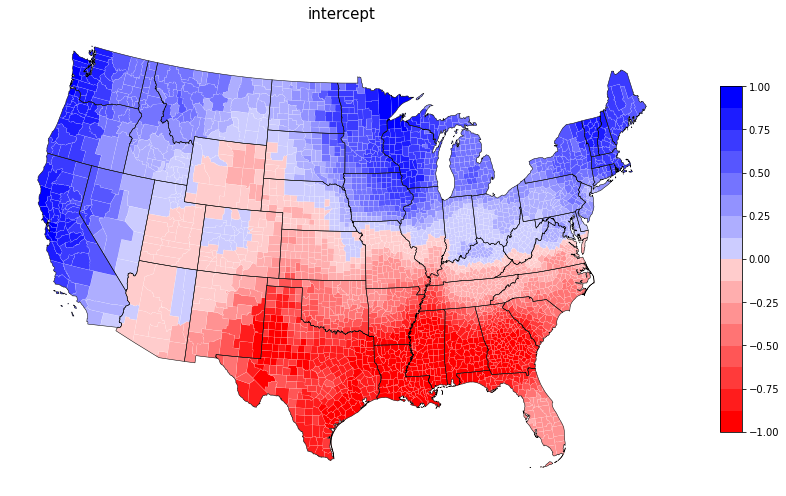

In [7]:
plot_b(0)

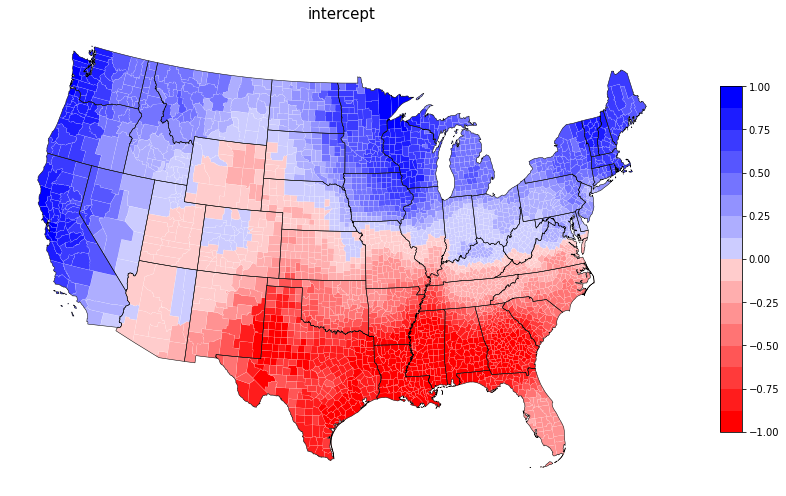

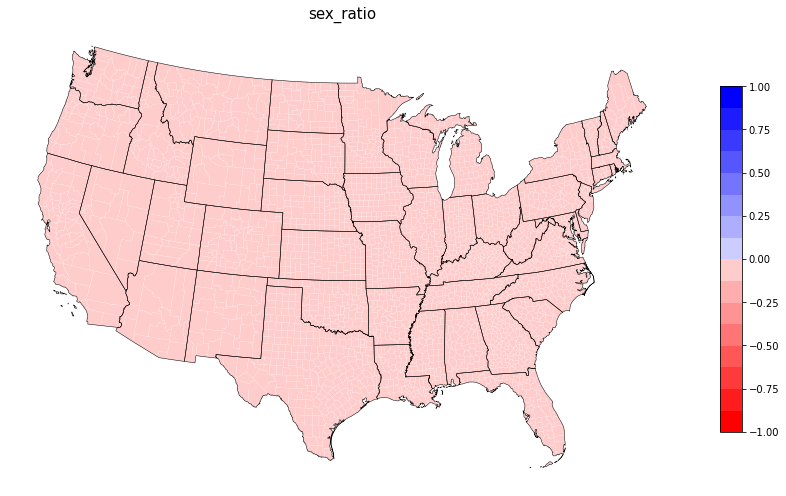

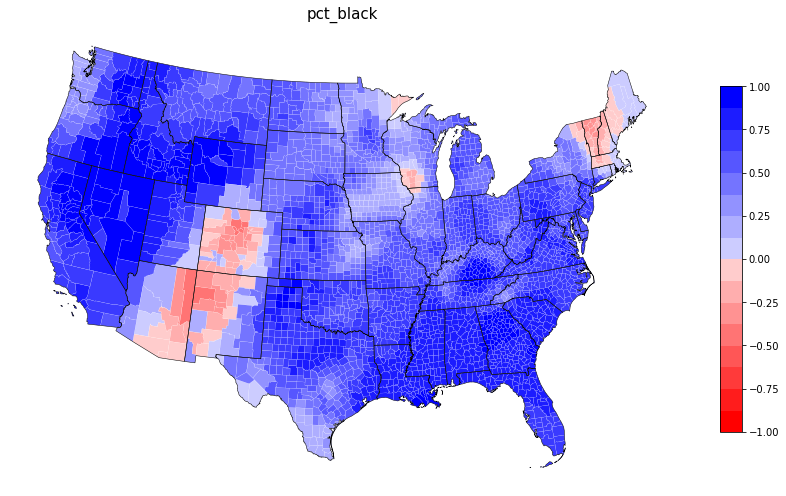

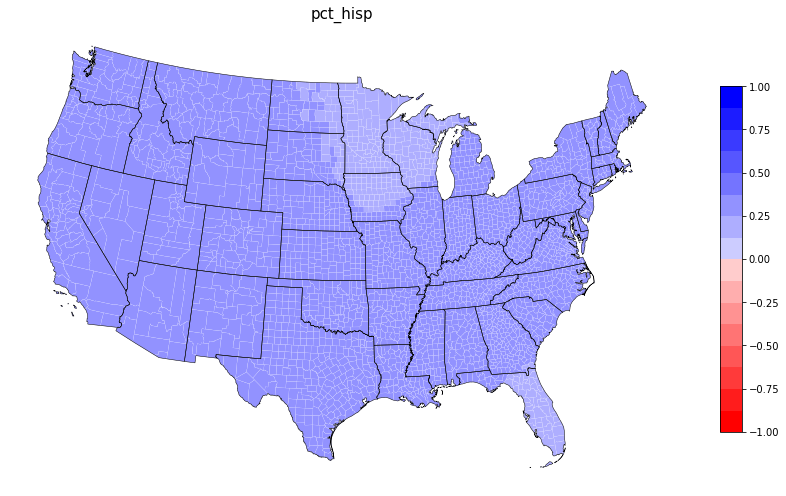

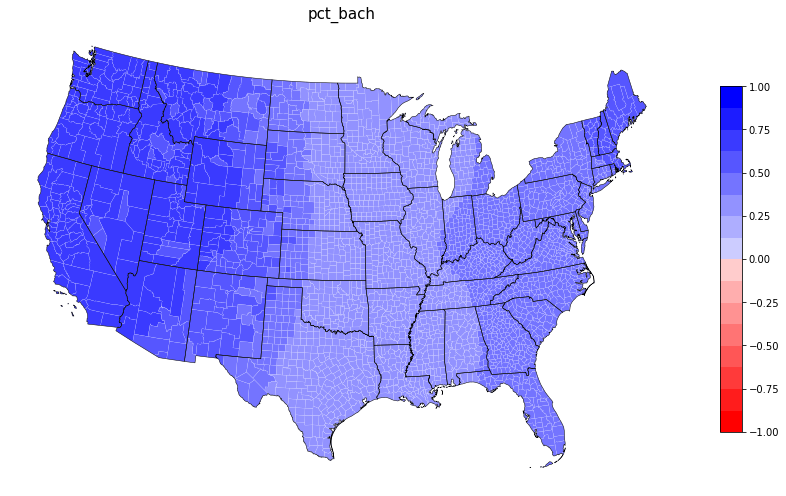

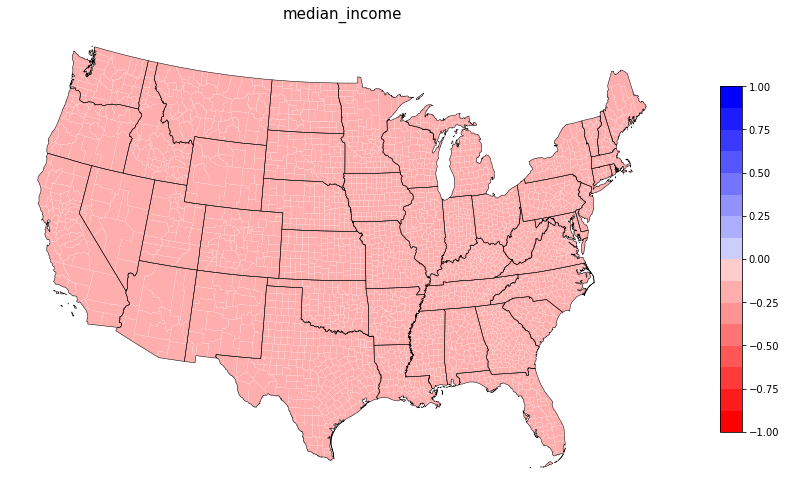

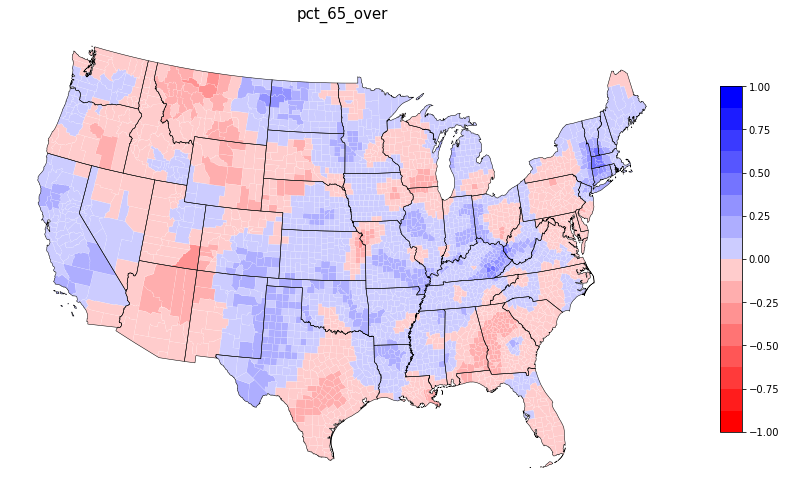

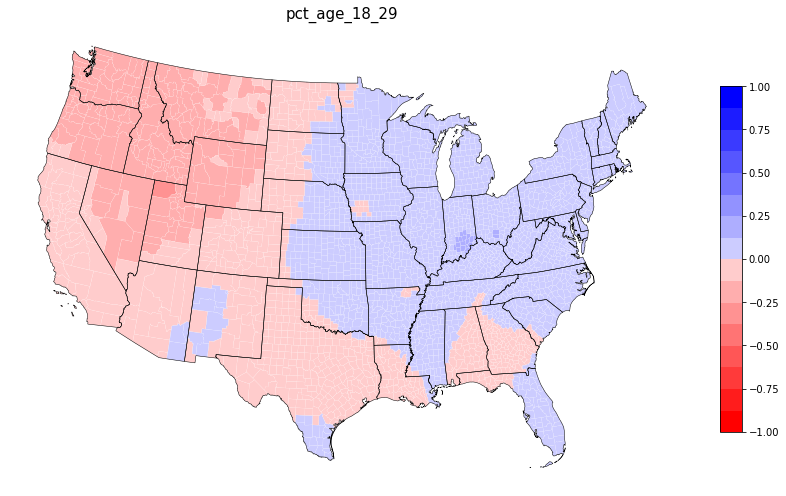

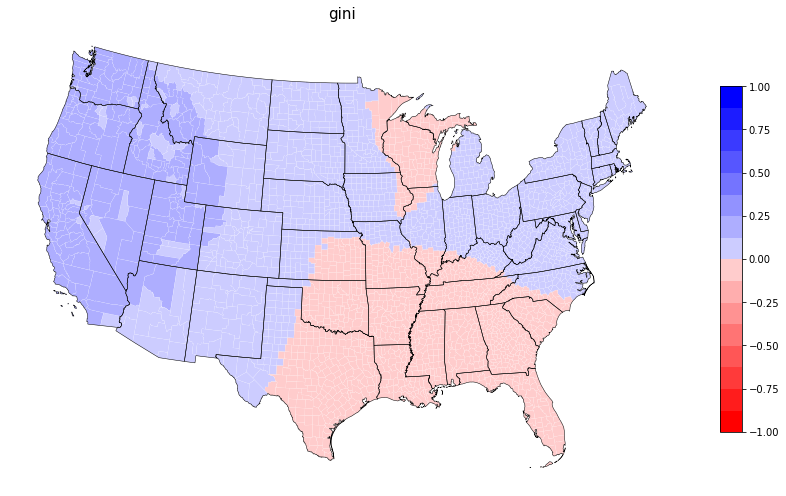

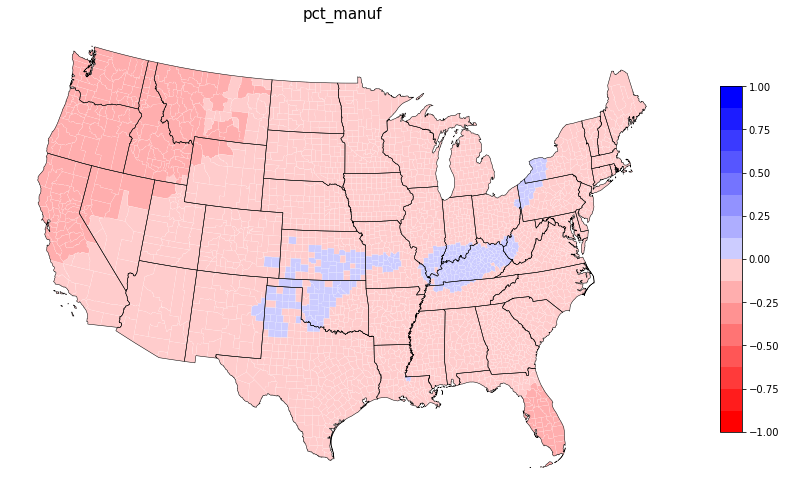

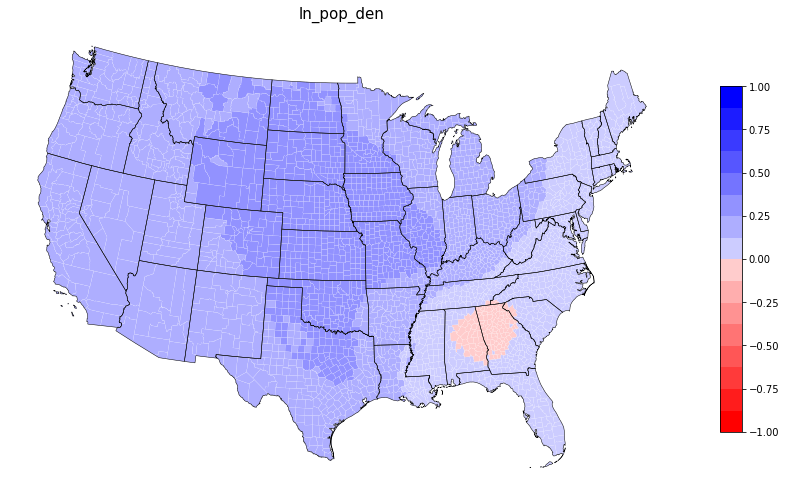

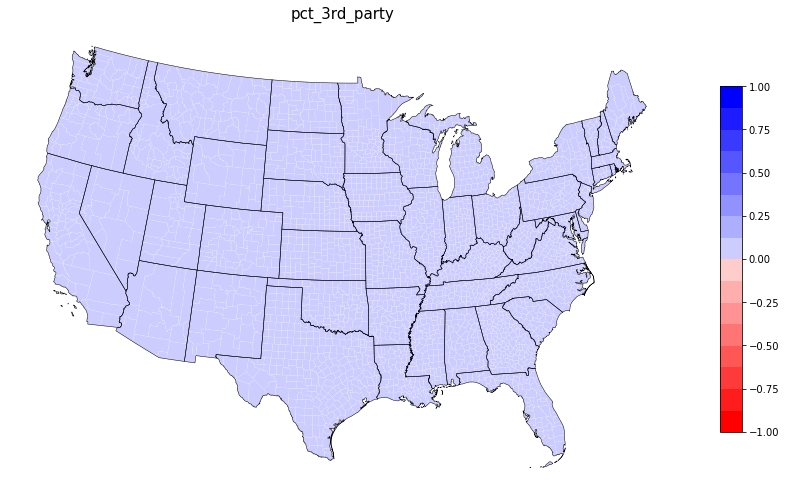

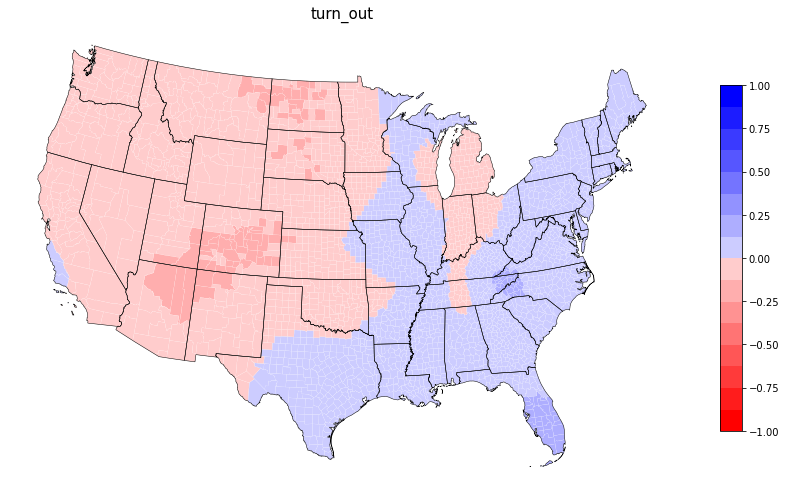

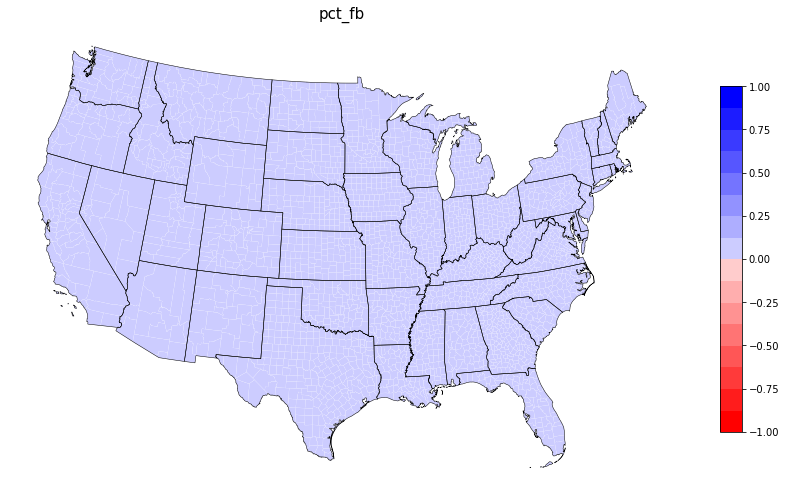

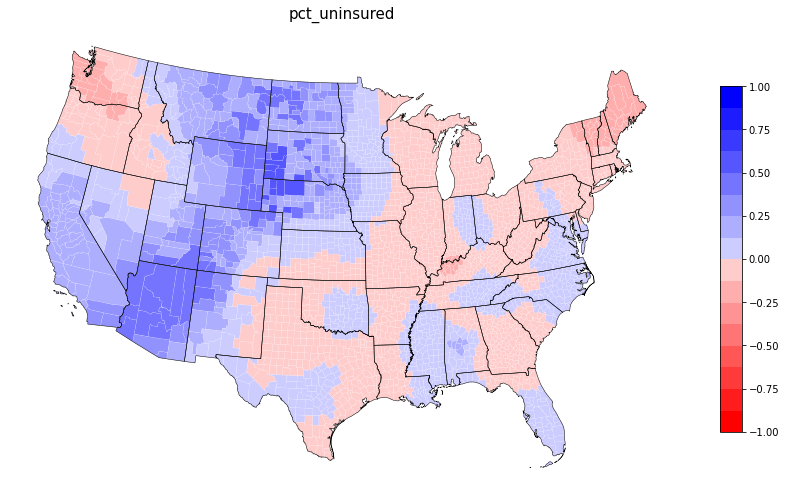

In [8]:
for j in range(15):
    plot_b(j)